In [1]:
import matplotlib.pyplot as plt
import os, re
import pandas as pd
import numpy as np

from datetime import datetime as dt
import cPickle as pickle
import re #Regex
import seaborn as sns
sns.set()
%matplotlib inline

# 1. Evaluating Crawling Indicator

In [2]:
# %time DATACrawl = pickle.load( open( "v1.4\DATA_ANALSISIS_crawl.p", "rb" ) )
%time DATACrawl = pickle.load( open( "v1.4\DATA_CRAWL-v4a.p", "rb" ) )
crawlIndicator = pd.DataFrame([DATACrawl.crawlMem,DATACrawl.crawlTime]).transpose()
crawlIndicator.describe()

Wall time: 464 ms


,crawlMem,crawlTime
count,1344.000000,1344.000000
mean,3305.297619,0.560610
std,707.734448,2.438639
min,2088.000000,0.033300
25%,2520.000000,0.126500
50%,3400.000000,0.149500
75%,4064.000000,0.465025
max,6832.000000,55.697400


In [3]:
DATA_ANALSISIS_crawl    = DATACrawl[DATACrawl.flag.isin([-1, 1])]

DATA_ANALSISIS_crawlPos = DATA_ANALSISIS_crawl[DATA_ANALSISIS_crawl.flag == 1]
DATA_ANALSISIS_crawlNeg = DATA_ANALSISIS_crawl
crawlAnalysis = pd.DataFrame([DATA_ANALSISIS_crawlPos.crawlMem,DATA_ANALSISIS_crawlPos.crawlTime,
                              DATA_ANALSISIS_crawlNeg.crawlMem,DATA_ANALSISIS_crawlNeg.crawlTime]).transpose()
crawlAnalysis.columns = ['Memory Positif','Time Positif','Memory Semua','Time Semua']
print 'Memory Positif : ',sum(DATA_ANALSISIS_crawlPos.crawlMem), 'Byte'
print 'Memory Semua   : ',sum(DATA_ANALSISIS_crawlNeg.crawlMem), 'Byte'
print 'Time Positif   : ',sum(DATA_ANALSISIS_crawlPos.crawlTime), 'Detik'
print 'Time Semua     : ',sum(DATA_ANALSISIS_crawlNeg.crawlTime),'Detik'
crawlAnalysis.describe()

Memory Positif :  1390864.0 Byte
Memory Semua   :  4442320.0 Byte
Time Positif   :  226.653 Detik
Time Semua     :  753.4597 Detik


,Memory Positif,Time Positif,Memory Semua,Time Semua
count,399.000000,399.000000,1344.000000,1344.000000
mean,3485.874687,0.568053,3305.297619,0.560610
std,760.059224,2.974858,707.734448,2.438639
min,2368.000000,0.046600,2088.000000,0.033300
25%,2808.000000,0.131350,2520.000000,0.126500
50%,3912.000000,0.146100,3400.000000,0.149500
75%,4072.000000,0.304900,4064.000000,0.465025
max,6832.000000,55.697400,6832.000000,55.697400


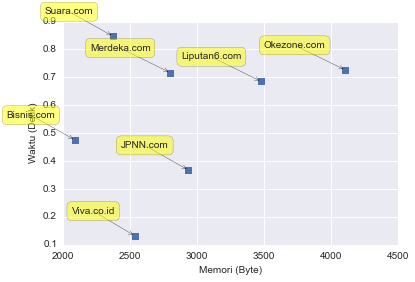

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = [1,2,3,5,6,7,8]
labels = ['Viva.co.id',  'Merdeka.com', 'Liputan6.com', 'Okezone.com', 'JPNN.com', 'Suara.com', 'Bisnis.com']
y1 = [DATACrawl[DATACrawl.sumber == i].crawlMem.mean() for i in x]
y2 = [DATACrawl[DATACrawl.sumber == i].crawlTime.mean() for i in x]

plt.plot(y1, y2,'s')
plt.xlabel('Memori (Byte)', fontsize=10)
plt.ylabel('Waktu (Detik)', fontsize=10)
for label, x, y in zip(labels, y1, y2):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
    
plt.show()

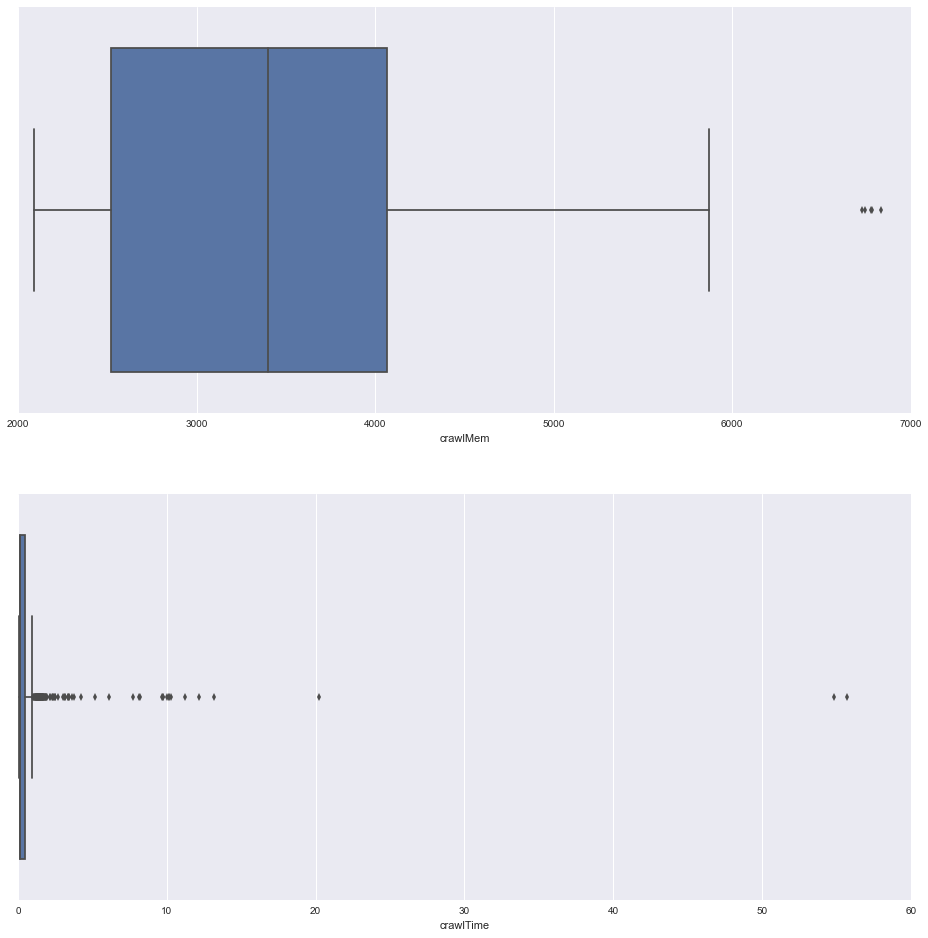

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2,figsize=(16,16))

sns.boxplot(crawlIndicator.crawlMem, orient = 'h',ax=ax[0])
sns.boxplot(crawlIndicator.crawlTime, orient = 'h', ax=ax[1])

plt.show()

#### Terlihat total penggunaan waktu dan memory sangat signifikan, hal tersebut karena jumlah berita positif dan negatif yang berbeda jauh

# 2.Evaluating the Classifier v1.4 vs v1.6 vs v2.0


## 2.1 Load from the 'Pickled' dump

In [6]:
DATAStd  = pd.DataFrame()
DATAPost = pd.DataFrame()

#Load standard striped Text
%time DATAStd['Judul'] = pickle.load( open( "v1.4\DATA_JUDULStriped-v4a.p", "rb" ) )
%time DATAStd['Short'] = pickle.load( open( "v1.4\DATA_SHORTStriped-v4a.p", "rb" ) )
%time DATAStd['Long']  = pickle.load( open( "v1.4\DATA_LONGStriped-v4a.p", "rb" ) )

#Load from PosTagged Noun and verb only Text
%time DATAPost['Judul'] = pickle.load( open( "v1.6\DATA_JUDULpostag-v5a.p", "rb" ) )
%time DATAPost['Short'] = pickle.load( open( "v1.6\DATA_SHORTpostag-v5a.p", "rb" ) )
%time DATAPost['Long']  = pickle.load( open( "v1.6\DATA_LONGpostag-v5a.p", "rb" ) )

#Load number of total tag in Text
%time AllFracJudul = pickle.load( open( "v2.0\DATA_JUDUL-v6a.p", "rb" ) )
%time AllFracShort = pickle.load( open( "v2.0\DATA_SHORT-v6a.p", "rb" ) )
%time AllFracLong  = pickle.load( open( "v2.0\DATA_LONG-v6a.p", "rb" ) )

#Load number of total noun-verb only in Text
# %time NVFracJudul = pickle.load( open( "v2.0\DATA_JUDUL-v2.p", "rb" ) )
# %time NVFracShort = pickle.load( open( "v2.0\DATA_SHORT-v2.p", "rb" ) )
# %time NVFracLong  = pickle.load( open( "v2.0\DATA_LONG-v2.p", "rb" ) )

%time DATA_TARGET = pickle.load( open( "v1.4\DATA_TARGET-v4a.p", "rb" ) )

DATA_TARGET = DATA_TARGET.reset_index(drop=True)
DATAStd  = DATAStd.reset_index(drop=True)
DATAPost = DATAPost.reset_index(drop=True)

Wall time: 28 ms
Wall time: 25 ms
Wall time: 226 ms
Wall time: 18 ms
Wall time: 19 ms
Wall time: 145 ms
Wall time: 92 ms
Wall time: 97 ms
Wall time: 92 ms
Wall time: 10 ms


In [7]:
#We only use 2% of total negative instance
factor = 100.0/100
size   = int(factor*DATA_TARGET[DATA_TARGET.values == -1].count())
print 'Total Negative Instances    : ',DATA_TARGET[DATA_TARGET.values == -1].count()
print 'Training Negative Instances : ',size
print 'Training Positif Instances  : ',DATA_TARGET[DATA_TARGET.values == 1].count()

Total Negative Instances    :  945
Training Negative Instances :  945
Training Positif Instances  :  399


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
#Stopwords data source : https://www.illc.uva.nl/Research/Publications/Reports/MoL-2003-02.text.pdf
stopword_html = open("id.stopwords.01.01.2016.txt",'r').read()
stopwords     = stopword_html.split("\n")

vect1 = CountVectorizer(decode_error='ignore')
vect2 = TfidfVectorizer(stop_words=stopwords,decode_error='ignore')

vectStds = vect1.fit_transform(DATAStd['Long'])
vectStop = vect2.fit_transform(DATAStd['Long'])
vectPost = vect1.fit_transform(DATAPost['Long'])

In [9]:
vectStds

<1344x22042 sparse matrix of type '<type 'numpy.int64'>'
	with 221332 stored elements in Compressed Sparse Row format>

In [10]:
vectStop

<1344x21439 sparse matrix of type '<type 'numpy.float64'>'
	with 148905 stored elements in Compressed Sparse Row format>

In [11]:
vectPost

<1344x19768 sparse matrix of type '<type 'numpy.int64'>'
	with 152161 stored elements in Compressed Sparse Row format>

In [12]:
print AllFracLong.shape

(1344L, 29L)


In [13]:
print (1871*28112)-331527
print (1871*27489)-229366
print (1871*25228)-233748

52266025
51202553
46967840


#### Data Teks berita yang sudah dibersihkan dari tag HTML di v1.4

In [14]:
print DATAStd.Judul.head(1).values

['6 keuntungan mengambil kpr saat masih lajang']


#### Data Teks berita yang sudah di-POSTag verb dan noun di v1.6

In [15]:
print DATAPost.Judul.head(1).values

['keuntungan mengambil kpr lajang']


#### Data Teks berita yang sudah diambil fraction verb dan noun di v2.0

In [16]:
AllFracJudul[:1]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.]])

## 2. Evaluate

### Preprocessing

![smiley](img/evaluasi_preproc.png)

In [17]:
from HTMLParser import HTMLParser
import string
import re #Regex

def posTag(par):
    postagger = pickle.load(open("POSTAGGER.p", "rb"))
    
    def onlyAZ(teks):
        return re.sub(r'[^a-zA-Z]',' ', teks)

    def onlyNVFromSentence(teks):
        splitted = postagger.tag(onlyAZ(teks).split())
        nouns = [word for word,pos in splitted \
            if (pos == 'NN' or pos == 'NNP' or 
                pos == 'NNS' or pos == 'VB')]
        nounsSentence = string.join(nouns)
        return nounsSentence

    class MLStripper(HTMLParser):
        def __init__(self):
            self.reset()
            self.fed = []
        def handle_data(self, d):
            self.fed.append(d)
        def get_data(self):
            return ' '.join(self.fed)

    def strip_tags(html):
        s = MLStripper()
        s.feed(html)
        striped  = s.get_data()                         #get HTML-Tags free text
        lowers   = striped.lower()                      #Lowercase all words
        nospace  = lowers.strip()                       #Remove leading and trailing white space
        return nospace

    par         = strip_tags(par)
    splittedPar = par.split('.')
    NVPar    = ' '.join([onlyNVFromSentence(i) for i in splittedPar])
    return  NVPar

In [18]:
#Stopwords data source : https://www.illc.uva.nl/Research/Publications/Reports/MoL-2003-02.text.pdf
stopword_html = open("id.stopwords.01.01.2016.txt",'r').read()
stopwords     = stopword_html.split("\n")

In [19]:
from sklearn import cross_validation
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.metrics import precision_score, recall_score, classification_report, roc_auc_score,roc_curve,auc
from scipy import interp
import datetime

def skorStratCV(clf,X,y,nfolds=10):
    metrics = []
    
    trainTime,testTime = [],[]
    precis,recals,f1s,accs,rocs = [],[],[],[],[]
    
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    all_tpr = []

    skf = cross_validation.StratifiedKFold(y, n_folds=nfolds)
    for train_index, test_index in skf:
        X_train,y_train = X[train_index],y[train_index]
        X_test,y_test   = X[test_index],y[test_index]
        
        #training time
        start = dt.now()
        clf.fit(X_train, y_train)
        end = dt.now()
        trainTime.append((end-start).microseconds)
        
        #testing time
        start = dt.now()
        yhat = clf.predict(X_test)
        end = dt.now()
        testTime.append((end-start).microseconds)
        
        #score
        precis.append(precision_score(y_test, yhat, average='binary'))
        recals.append(recall_score(y_test, yhat, average='binary'))
        f1s.append(f1_score(y_test, yhat, average='binary'))
        accs.append(accuracy_score(y_test, yhat))
        
        probas_              = clf.fit(X_train, y_train).predict_proba(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
        mean_tpr            += interp(mean_fpr, fpr, tpr)
        mean_tpr[0]          = 0.0
        
    def ave(lis):
        return sum(lis)/len(lis)
    
    metrics.append(ave(trainTime)+ave(testTime))
#     metrics.append(ave(testTime))
    metrics.append(ave(precis))
    metrics.append(ave(recals))
    metrics.append(ave(f1s))
    metrics.append(ave(accs))
    
    mean_tpr /= nfolds
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    metrics.append(mean_auc)
    
    return metrics,mean_fpr,mean_tpr

In [20]:
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

mnb = MultinomialNB(alpha=0.1)
#knn = KNeighborsClassifier()
svc = SVC(kernel='linear',cache_size=800,probability=True)
#tre = DecisionTreeClassifier(class_weight='balanced')

vectCnts = TfidfVectorizer(decode_error='ignore')
vectStds = TfidfVectorizer(decode_error='ignore')
#vectStop = TfidfVectorizer(stop_words=stopwords,decode_error='ignore')

kombinasi13 = [{'name' : 'MNB', 'pipe' : Pipeline([('vect', vectCnts),('clf', mnb)])},
               #{'name' : 'KNN', 'pipe' : Pipeline([('vect', vect),('clf', knn)])},
               {'name' : 'SVM', 'pipe' : Pipeline([('vect', vectCnts),('clf', svc)])},
               #{'name' : 'TREE', 'pipe' : Pipeline([('vect', vect),('clf', tre)])}
              ]

kombinasi24= [{'name' : 'MNB', 'pipe' : Pipeline([('vect', vectStds),('clf', mnb)])},
             #{'name' : 'KNN', 'pipe' : Pipeline([('vect', vect),('clf', knn)])},
             {'name' : 'SVM', 'pipe' : Pipeline([('vect', vectStds),('clf', svc)])},
             #{'name' : 'TREE', 'pipe' : Pipeline([('vect', vect),('clf', tre)])}
             ]

kombinasi5 = [{'name' : 'MNB', 'pipe' : mnb},
               {'name' : 'SVM', 'pipe' : svc},
             ]

In [21]:
kombinasi13[0]['pipe']

Pipeline(steps=[('vect', TfidfVectorizer(analyzer=u'word', binary=False, decode_error='ignore',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf=True,...rue,
        vocabulary=None)), ('clf', MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True))])

In [22]:
print len(AllFracJudul)
print len(AllFracShort)
print len(AllFracJudul+AllFracShort)

1344
1344
1344


In [23]:
k = 'aku akan memakan semua makanan itu'

def stopwordRemoval(text):
    text = ' '.join([word for word in text.split() if word not in stopwords])
    return text

print stopwordRemoval(k)
JudulStop = DATAStd['Judul'].map(lambda x: stopwordRemoval(x))
ShortStop = DATAStd['Short'].map(lambda x: stopwordRemoval(x))
LongStop  = DATAStd['Long'].map(lambda x: stopwordRemoval(x))
Feed1Stop  = JudulStop+' '+ShortStop
Feed2Stop  = JudulStop+' '+LongStop+' '+ShortStop

JudulPostStop = DATAPost['Judul'].map(lambda x: stopwordRemoval(x))
ShortPostStop = DATAPost['Short'].map(lambda x: stopwordRemoval(x))
LongPostStop  = DATAPost['Long'].map(lambda x: stopwordRemoval(x))
Feed1PostStop  = JudulPostStop+' '+ShortPostStop
Feed2PostStop  = JudulPostStop+' '+LongPostStop+' '+ShortPostStop

print DATAStd['Judul'][198]
print JudulStop[198]

memakan makanan
hasil kunjungan menteri rini ke eropa, gandeng rolls royce
hasil kunjungan menteri rini eropa, gandeng rolls royce


In [27]:
X0 = []
# X0.append({'name':'Judul','Prep':'Kombinasi1','Data':DATAStd['Judul']})
# X0.append({'name':'Short','Prep':'Kombinasi1','Data':DATAStd['Short']})
# X0.append({'name':'Long' ,'Prep':'Kombinasi1','Data':DATAStd['Long']})
X0.append({'name':'rss' ,'Prep':'KTF','Data':DATAStd['Judul']+' '+DATAStd['Short']})
X0.append({'name':'full' ,'Prep':'KTF','Data':DATAStd['Judul']+' '+DATAStd['Long']+' '+DATAStd['Short']})


# X1 = []
# X1.append({'name':'Judul','Prep':'Kombinasi2','Data':JudulStop})
# X1.append({'name':'Short','Prep':'Kombinasi2','Data':ShortStop})
# X1.append({'name':'Long' ,'Prep':'Kombinasi2','Data':LongStop})
# X1.append({'name':'Feed' ,'Prep':'Kombinasi2','Data':FeedStop})

# X2 = []
# X2.append({'name':'Judul','Prep':'Kombinasi3','Data':DATAPost['Judul']})
# X2.append({'name':'Short','Prep':'Kombinasi3','Data':DATAPost['Short']})
# X2.append({'name':'Long' ,'Prep':'Kombinasi3','Data':DATAPost['Long']})
# X2.append({'name':'Feed' ,'Prep':'Kombinasi3','Data':DATAPost['Judul']+' '+DATAPost['Short']})

X3 = []
# X3.append({'name':'Judul','Prep':'Kombinasi4','Data':JudulPostStop})
# X3.append({'name':'Short','Prep':'Kombinasi4','Data':ShortPostStop})
# X3.append({'name':'Long' ,'Prep':'Kombinasi4','Data':LongPostStop})
X3.append({'name':'rss' ,'Prep':'KSP','Data':Feed1PostStop})
X3.append({'name':'full' ,'Prep':'KSP','Data':Feed2PostStop})

X4 = []
# X4.append({'name':'Judul','Prep':'Kombinasi5','Data':AllFracJudul})
# X4.append({'name':'Short','Prep':'Kombinasi5','Data':AllFracShort})
# X4.append({'name':'Long' ,'Prep':'Kombinasi5','Data':AllFracLong})
X4.append({'name':'rss' ,'Prep':'KPT','Data':AllFracJudul+AllFracShort})
X4.append({'name':'full' ,'Prep':'KPT','Data':AllFracJudul+AllFracLong+AllFracShort})

# X2.append({'name':'Judul','Prep':'NVTag','Data':NVFracJudul})
# X2.append({'name':'Short','Prep':'NVTag','Data':NVFracShort})
# X2.append({'name':'Long' ,'Prep':'NVTag','Data':NVFracLong})

y_  = DATA_TARGET

## Kombinasi 1

In [28]:
for i in X0:
    k     = vect1.fit_transform(i['Data'])
    print k.get_shape()

(1344, 5930)
(1344, 22308)


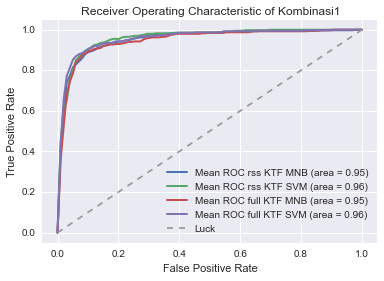

In [29]:
import matplotlib.pyplot as plt

metric = []
for xi in X0:
    X_ = xi['Data']
    for mod in kombinasi13:
        xP = X_[y_[y_.values == 1].index]
        xN = X_[y_[y_.values == -1].index][:size]
        X  = np.append(xP,xN)
        
        yP = y_[y_.values == 1]
        yN = y_[y_.values == -1][:size]
        y  = np.append(yP,yN)
        
        metrics,mean_fpr,mean_tpr = skorStratCV(mod['pipe'],X,y)
        name = xi['name']+' '+xi['Prep']+' '+mod['name']
        plt.plot(mean_fpr, mean_tpr,label='Mean ROC %s (area = %0.2f)' % (name,metrics[5]), lw=2)
        
        metric.append({'name':name,'metrics':metrics})

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of KTF')
plt.legend(loc="lower right")
plt.show()

## Kombinasi 2

In [30]:
# for i in X1:
#     k     = vect2.fit_transform(i['Data'])
#     print k.get_shape()

In [31]:
# #metric = []
# for xi in X1:
#     X_ = xi['Data']
#     for mod in kombinasi24:
#         xP = X_[y_[y_.values == 1].index]
#         xN = X_[y_[y_.values == -1].index][:size]
#         X  = np.append(xP,xN)
        
#         yP = y_[y_.values == 1]
#         yN = y_[y_.values == -1][:size]
#         y  = np.append(yP,yN)
        
#         metrics,mean_fpr,mean_tpr = skorStratCV(mod['pipe'],X,y)
#         name = xi['name']+' '+xi['Prep']+' '+mod['name']
#         plt.plot(mean_fpr, mean_tpr,label='Mean ROC %s (area = %0.2f)' % (name,metrics[5]), lw=2)
        
#         metric.append({'name':name,'metrics':metrics})

# plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
# plt.xlim([-0.05, 1.05])
# plt.ylim([-0.05, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic of Kombinasi2')
# plt.legend(loc="lower right")
# plt.show()

## Kombinasi 3

In [32]:
# for i in X2:
#     k     = vect1.fit_transform(i['Data'])
#     print k.get_shape()

In [33]:
# #metric = []
# for xi in X2:
#     X_ = xi['Data']
#     for mod in kombinasi13:
#         xP = X_[y_[y_.values == 1].index]
#         xN = X_[y_[y_.values == -1].index][:size]
#         X  = np.append(xP,xN)
        
#         yP = y_[y_.values == 1]
#         yN = y_[y_.values == -1][:size]
#         y  = np.append(yP,yN)
        
#         metrics,mean_fpr,mean_tpr = skorStratCV(mod['pipe'],X,y)
#         name = xi['name']+' '+xi['Prep']+' '+mod['name']
#         plt.plot(mean_fpr, mean_tpr,label='Mean ROC %s (area = %0.2f)' % (name,metrics[5]), lw=2)
        
#         metric.append({'name':name,'metrics':metrics})

# plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
# plt.xlim([-0.05, 1.05])
# plt.ylim([-0.05, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic of Kombinasi3')
# plt.legend(loc="lower right")
# plt.show()

## Kombinasi 4

In [34]:
for i in X3:
    k     = vect2.fit_transform(i['Data'])
    print k.get_shape()

(1344, 5006)
(1344, 19616)


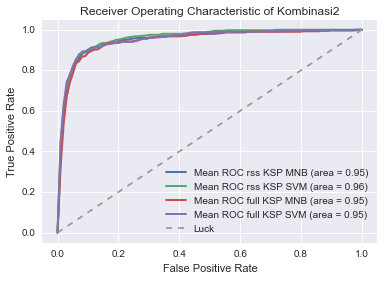

In [35]:
#metric = []
for xi in X3:
    X_ = xi['Data']
    for mod in kombinasi24:
        xP = X_[y_[y_.values == 1].index]
        xN = X_[y_[y_.values == -1].index][:size]
        X  = np.append(xP,xN)
        
        yP = y_[y_.values == 1]
        yN = y_[y_.values == -1][:size]
        y  = np.append(yP,yN)
        
        metrics,mean_fpr,mean_tpr = skorStratCV(mod['pipe'],X,y)
        name = xi['name']+' '+xi['Prep']+' '+mod['name']
        plt.plot(mean_fpr, mean_tpr,label='Mean ROC %s (area = %0.2f)' % (name,metrics[5]), lw=2)
        
        metric.append({'name':name,'metrics':metrics})

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of KSP')
plt.legend(loc="lower right")
plt.show()

## Kombinasi 5

C:\Users\Thosan Girisona S\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Thosan Girisona S\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


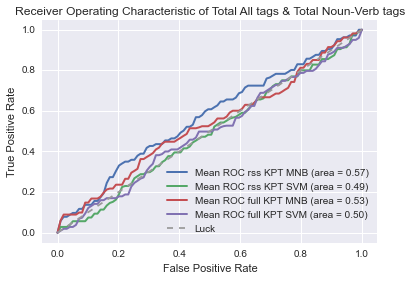

In [36]:
#metric = []
y2_  = pickle.load( open( "v2.0\DATA_TARGET-v5b.p", "rb" ) )
for xi in X4:
    X_ = xi['Data']
    for mod in kombinasi5:
        xP = X_[y2_[y2_.values == 1].index]
        xN = X_[y2_[y2_.values == -1].index][:size]
        X  = np.vstack((xP,xN))

        yP = y2_[y2_.values == 1]
        yN = y2_[y2_.values == -1][:size]
        y  = np.append(yP,yN)
        
        metrics,mean_fpr,mean_tpr = skorStratCV(mod['pipe'],X,y)
        name = xi['name']+' '+xi['Prep']+' '+mod['name']
        plt.plot(mean_fpr, mean_tpr,label='Mean ROC %s (area = %0.2f)' % (name,metrics[5]), lw=2)
        
        metric.append({'name':name,'metrics':metrics})

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of Total All tags & Total Noun-Verb tags')
plt.legend(loc="lower right")
plt.show()

In [37]:
from ipy_table import *
metrics_table = []
tables = []
columns = (['id', 'nama','time','p_1',
            'r_1','F1 score','accuracy','AUC'])
tables.append(columns)

i = 0

for me in metric:
    i += 1
    
    metr = []
    metr.append(i)
    metr.append(me['name'])
    for m in me['metrics']:
        metr.append(m)

    tables.append(metr)
    metrics_table.append(metr)
    #print metric
    
make_table(tables)

# styling
apply_theme('basic_both')
set_column_style(7, align='center')

id,nama,time,p_1,r_1,F1 score,accuracy,AUC
1,rss KTF MNB,141100,0.8557,0.8196,0.8345,0.9048,0.9526
2,rss KTF SVM,704300,0.8824,0.7744,0.8230,0.9018,0.9579
3,full KTF MNB,816900,0.8904,0.8019,0.8382,0.9107,0.9469
4,full KTF SVM,920200,0.8955,0.7992,0.8392,0.9107,0.9569
5,rss KSP MNB,115300,0.8487,0.8521,0.8461,0.9092,0.9512
6,rss KSP SVM,633900,0.8870,0.7921,0.8349,0.9077,0.9570
7,full KSP MNB,902400,0.8593,0.8246,0.8358,0.9055,0.9453
8,full KSP SVM,843500,0.8969,0.7993,0.8401,0.9107,0.9523
9,rss KPT MNB,17300,0.0333,0.0091,0.0143,0.8442,0.5677
10,rss KPT SVM,207300,0.0000,0.0000,0.0000,0.8471,0.4918


In [38]:
evals = pd.DataFrame(metrics_table,columns=columns)
evals['Vars'] = [i.split()[0] for i in evals['nama']]
evals['Prep'] = [i.split()[1] for i in evals['nama']]
evals['Algs'] = [i.split()[2] for i in evals['nama']]
evals['Time'] = evals['time']
evals.drop('nama',axis=1,inplace=True)
evals.drop('id',axis=1,inplace=True)
evals

,time,p_1,r_1,F1 score,accuracy,AUC,Vars,Prep,Algs,Time
0,141100,0.855701,0.819551,0.834507,0.904764,0.952586,rss,KTF,MNB,141100
1,704300,0.882432,0.774359,0.822983,0.901762,0.957934,rss,KTF,SVM,704300
2,816900,0.890438,0.801859,0.838163,0.910668,0.946886,full,KTF,MNB,816900
3,920200,0.895463,0.799167,0.839250,0.910690,0.956904,full,KTF,SVM,920200
4,115300,0.848748,0.852115,0.846102,0.909236,0.951160,rss,KSP,MNB,115300
5,633900,0.886995,0.792115,0.834862,0.907722,0.957002,rss,KSP,SVM,633900
6,902400,0.859331,0.824551,0.835816,0.905511,0.945338,full,KSP,MNB,902400
7,843500,0.896876,0.799295,0.840066,0.910701,0.952255,full,KSP,SVM,843500
8,17300,0.033333,0.009091,0.014286,0.844236,0.567703,rss,KPT,MNB,17300
9,207300,0.000000,0.000000,0.000000,0.847053,0.491803,rss,KPT,SVM,207300


In [39]:
evals.to_csv('Hasil3.csv')

IOError: [Errno 13] Permission denied: 'Hasil3.csv'

In [ ]:
# splitter1 = ['Judul','Short','Long']
splitter1 = ['Feed1','Feed2']
# splitter2 = ['Kombinasi1','Kombinasi2','Kombinasi3','Kombinasi4','Kombinasi5']
splitter2 = ['Kombinasi1','Kombinasi2','Kombinasi3']
eval_teks = evals[evals.Prep.isin(splitter2)]
eval_teks = pd.DataFrame([eval_teks[eval_teks.Vars == i].mean() for i in splitter1]).transpose()
eval_teks.set_axis(1,splitter1)
eval_teks

In [ ]:
# splitter = ['Kombinasi1','Kombinasi2','Kombinasi3','Kombinasi4','Kombinasi5']
splitter = ['Kombinasi1','Kombinasi2','Kombinasi3']
eval_prep = pd.DataFrame([evals[evals.Prep == i].mean() for i in splitter]).transpose()
eval_prep.set_axis(1,splitter)
eval_prep

In [ ]:
splitter1 = ['MNB','SVM']
eval_teks = evals[evals.Algs.isin(splitter1)]
eval_teks = pd.DataFrame([eval_teks[eval_teks.Algs == i].mean() for i in splitter1]).transpose()
eval_teks.set_axis(1,splitter1)
eval_teks

In [ ]:
mnb

In [ ]:
#knn
# knn_params = {'n_neighbors': range(1,21), 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree'],
#               'leaf_size': [15, 30, 50, 100], 'p': [1,2]}

In [ ]:
svc
# lsvm_params = {'loss':['hinge', 'squared_hinge'],'class_weight':['balanced']}

In [ ]:
#tre
# tree_param = {"criterion": ["gini", "entropy"],"class_weight" : ['balanced']}